---
title: Fantasy Basketball 9 Category Simulations 
description: An NBA API Investigation
date: 05-18-2024
author: Maxwell Patterson
categories: [Basketball]
format: 
  html:
    code-fold: false
    code-tools: true
---

![](conley.png){width=90%}

# Introduction

In this blog post, I will be exploring the NBA API and combining it with data pulled from my fantasy league. Our league is a dynasty format, where the same players are kept each season and only rookies are drafted. See *The Dynamics of Dynasty* blog post for a deep dive on the league! 

First, let's start by loading in the fantasy league data to get the fantasy team each player is on. Then this data will be merged with data from the NBA API to pull players stats from last season.

# Data Preprocessing

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
from itertools import combinations
from IPython.display import display, HTML

from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import leaguedashplayerstats

In [195]:
# Load in fantasy data
fantrax_data = pd.read_csv("fantrax_05_18_2024.csv")

# Keep only 'Player' and 'Status' columns
fantrax_data = fantrax_data[['Player', 'Status', 'FPts', 'FP/G']]

# Removing free agent players
fantrax_data = fantrax_data[fantrax_data['Status'] != 'FA']

# Updating Status column name
fantrax_data = fantrax_data.rename(columns = {'Status': 'Fantasy Team'})

# Create dictionary to redefine team names 
status_mapping = {
    'CCC': 'Cream City',
    'STARKS': 'Winterfell',
    'BBB': 'Bikini Bottom',
    'HBC': 'Helsinki',
    'Jmarr237': 'Malibu',
    'maxpat01': 'Santa Barbara',
    'GBRAYERS': 'Scottsdale',
    'BIGFOOTS': 'Beaverton',
    '$?$': 'Las Vegas',
    'SDP': 'San Diego',
    'SERP': 'Slytherin',
    'Orcas': 'Anacortes'
}

# Apply team name mapping
fantrax_data['Fantasy Team'] = fantrax_data['Fantasy Team'].map(status_mapping)

Now that the Fantrax data is cleaned, we can join it with each players stats pulled from the NBA API.

In [196]:
# Extract player names
player_names = fantrax_data['Player'].tolist()

# Get player information from NBA API
nba_players = players.get_players()

player_id_map = {player['full_name']: player['id'] for player in nba_players if player['full_name'] in player_names}

fantrax_data['Player_ID'] = fantrax_data['Player'].map(player_id_map)

player_stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2023-24').get_data_frames()[0]

df = pd.merge(fantrax_data, player_stats, left_on='Player_ID', right_on='PLAYER_ID', how='left')

Let's check out the data to make sure it looks good.


In [197]:
df

,Player,Fantasy Team,FPts,FP/G,Player_ID,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,Nikola Jokic,Cream City,5154,65.24,203999.0,203999.0,Nikola Jokic,Nikola,1.610613e+09,DEN,...,32.0,541.0,542.0,6.0,5.0,1.0,1.0,2.0,2.0,2.0
1,Luka Doncic,Winterfell,4644,66.34,1629029.0,1629029.0,Luka Doncic,Luka,1.610613e+09,DAL,...,108.0,497.0,475.0,4.0,1.0,32.0,2.0,6.0,3.0,1.0
2,Giannis Antetokounmpo,Bikini Bottom,4394,60.19,203507.0,203507.0,Giannis Antetokounmpo,Giannis,1.610613e+09,MIL,...,22.0,565.0,555.0,1.0,3.0,29.0,3.0,4.0,4.0,3.0
3,Domantas Sabonis,Bikini Bottom,4345,52.99,1627734.0,1627734.0,Domantas Sabonis,Domantas,1.610613e+09,SAC,...,64.0,561.0,571.0,12.0,26.0,130.0,5.0,1.0,1.0,5.0
4,Anthony Davis,Bikini Bottom,4338,57.08,203076.0,203076.0,Anthony Davis,Anthony,1.610613e+09,LAL,...,4.0,559.0,524.0,7.0,12.0,85.0,4.0,3.0,10.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Steven Adams,Scottsdale,0,0.00,203500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,Lonzo Ball,Las Vegas,0,0.00,1628366.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,Kai Jones,Scottsdale,0,0.00,1630539.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,Christian Koloko,Cream City,0,0.00,1631132.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data has been merged successfully! Now, let's perform some data cleaning to filter out players that were not active last season.

In [198]:
df = df.dropna()

While our league is a points league, where fantasy points are the scoring metric, some leagues are set up as a 9 category format where teams try to win each week based on the 9 main statistical categories. 

The categories are:
- Points
- Rebounds
- Assists
- Steals
- Blocks
- Field goal percentage
- Free throw percentage
- Three pointers made
- Turnovers

Let's see where each fantasy teams strengths would be in this format!

In [199]:
# Columns to be used for Z-score calculations
categories = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'FG_PCT', 'FT_PCT', 'FG3M', 'TOV']

# Calculate Z-scores for each player in each category
for category in categories:
    df[category + '_Z'] = (df[category] - df[category].mean()) / df[category].std()

# Aggregate the Z-scores by team
team_z_scores = df.groupby('Fantasy Team')[[category + '_Z' for category in categories]].mean()

display(HTML(team_z_scores.to_html(float_format="%.2f", border=0, justify='center')))

<ipython-input-199-34b8360b5f12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category + '_Z'] = (df[category] - df[category].mean()) / df[category].std()
<ipython-input-199-34b8360b5f12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category + '_Z'] = (df[category] - df[category].mean()) / df[category].std()
<ipython-input-199-34b8360b5f12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,PTS_Z,REB_Z,AST_Z,STL_Z,BLK_Z,FG_PCT_Z,FT_PCT_Z,FG3M_Z,TOV_Z
Fantasy Team,,,,,,,,,
Anacortes,-0.24,-0.28,-0.23,-0.27,-0.18,0.07,-0.36,-0.28,-0.16
Beaverton,0.22,-0.21,0.08,0.20,-0.30,-0.33,0.26,0.58,0.19
Bikini Bottom,0.47,0.60,0.52,0.36,0.38,0.28,0.23,0.05,0.47
Cream City,0.18,0.44,0.06,0.33,0.42,0.29,0.27,0.24,0.04
Helsinki,-0.03,-0.13,-0.02,-0.03,-0.06,0.09,-0.24,-0.13,-0.14
Las Vegas,-0.27,-0.30,-0.40,-0.19,-0.25,-0.21,-0.20,-0.08,-0.23
Malibu,0.38,0.43,0.42,0.34,0.36,0.07,0.25,0.30,0.32
San Diego,0.05,-0.10,-0.01,0.16,-0.04,0.06,0.20,0.11,0.06
Santa Barbara,-0.21,-0.24,-0.23,-0.12,0.01,-0.02,-0.24,0.07,-0.10


This table shows us which teams are strongest in each categories. As we saw in the previous post, BBB (Bikini Bottom Ballers) are by far the strongest team. JMarr237 (Malibu Mamas) also has a deep roster with lots of good players. 

# Monte Carlo Simulation

When it comes to predicting the outcome of a fantasy basketball season, there are many factors to consider. Each team's performance can vary from week to week based on the number of games their players have, potential injuries, and the inherent randomness of sports. This is where Monte Carlo simulations come in handy.

Monte Carlo simulations are a powerful tool that allows us to model complex systems and account for randomness. In the context of our fantasy basketball league, we can use these simulations to generate many possible outcomes for the season, taking into account the variability in each team's performance.

Think of it like a game of tug-of-war. Each team's Z score represents their baseline strength in a particular category. The higher the Z score, the stronger the team is in that category. However, just like in a real game of tug-of-war, there are external factors that can influence the outcome, such as the condition of the rope, the terrain, or even a momentary lapse in concentration from one of the participants. In our simulation, we'll be using three levels of randomness: low, medium, and high. These levels represent how much each team's performance can deviate from their expected Z scores each week. A low level of randomness means that the results will be closer to what we expect based on the Z scores, while a high level of randomness introduces more unpredictability.

By running the simulation 250 times, we can generate a wide range of plausible scenarios. Each simulation will give us a different set of results, and by analyzing these results, we can gain insights into the likelihood of various outcomes.

For example, let's say Team A has a higher Z score than Team B in the "points" category. In a single simulation, Team B might win that category due to the randomness factor. However, across 250 simulations, we would expect Team A to win the "points" category more often than Team B.

Monte Carlo simulations help us account for the complexities and uncertainties in a fantasy basketball season. By embracing randomness and running many simulations, we can better understand the range of possible outcomes and make more informed decisions when managing our fantasy teams.

In [200]:
team_z_scores = team_z_scores.reset_index()

# Parameters
teams = team_z_scores['Fantasy Team'].unique()
categories = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'FG_PCT', 'FT_PCT', 'FG3M', 'TOV']
randomness_levels = {'low': 0.3, 'medium': 0.6, 'high': 0.90}
num_weeks = 22
num_simulations = 250

In [201]:
# Initialize results df to track wins, losses, and ties
results_template = pd.DataFrame(0, index=teams, columns=['Wins', 'Losses'])

In [202]:
# Monte Carlo season simulation
def simulate_season(randomness):
    weekly_results = results_template.copy()
    
    # Create a schedule where each team plays every other team twice
    matchups = list(combinations(teams, 2)) * 2
    random.shuffle(matchups)  # Randomize the order of matchups

    # Distribute matchups across 22 weeks
    weeks = [matchups[i:i + len(teams)//2] for i in range(0, len(matchups), len(teams)//2)]

    for week in weeks:
        for team1, team2 in week:
            team1_score = 0
            team2_score = 0
            
            for category in categories:
                team1_z = team_z_scores.loc[team_z_scores['Fantasy Team'] == team1, category + '_Z'].values[0]
                team2_z = team_z_scores.loc[team_z_scores['Fantasy Team'] == team2, category + '_Z'].values[0]
                
                team1_z += np.random.normal(0, randomness * abs(team1_z))
                team2_z += np.random.normal(0, randomness * abs(team2_z))
                
                if category == 'TOV':
                    if team1_z < team2_z:  # Fewer turnovers is better
                        team1_score += 1
                    else:
                        team2_score += 1
                else:
                    if team1_z > team2_z:  # More is better for other categories
                        team1_score += 1
                    else:
                        team2_score += 1
            
            if team1_score > team2_score:
                weekly_results.at[team1, 'Wins'] += 1
                weekly_results.at[team2, 'Losses'] += 1
            elif team1_score < team2_score:
                weekly_results.at[team1, 'Losses'] += 1
                weekly_results.at[team2, 'Wins'] += 1
    
    return weekly_results

In [203]:
# Simulate season 250 times for each level of randomness
def simulate_multiple_seasons(randomness, num_simulations):
    all_simulation_results = []

    for _ in range(num_simulations):
        season_results = simulate_season(randomness)
        all_simulation_results.append(season_results['Wins'].copy())

    # Combine all simulation results into a DataFrame
    all_simulation_results_df = pd.concat(all_simulation_results, axis=1)
    all_simulation_results_df.columns = range(num_simulations)
    
    # Calculate average results
    average_results = all_simulation_results_df.mean(axis=1)
    return average_results, all_simulation_results_df

Now that the Monte Carlo simulation functions have been set up, we can run the simulation 250 times.

In [204]:
# Perform the simulations
final_results = {}
simulation_results = {}

for level, randomness in randomness_levels.items():
    avg_results, all_results_df = simulate_multiple_seasons(randomness, num_simulations)
    final_results[level] = avg_results
    simulation_results[level] = all_results_df

In [205]:
# Combine the final averaged results for each randomness level into a single DataFrame
results_table = pd.concat(final_results, axis=1)
results_table.columns = [f'{level.capitalize()} Randomness' for level in results_table.columns.get_level_values(0)]

# Sort the table by 'Low Randomness' wins in descending order
results_table_sorted = results_table.sort_values(by='Low Randomness', ascending=False)

display(HTML(results_table_sorted.to_html(float_format="%.2f", border=0, justify='center')))

,Low Randomness,Medium Randomness,High Randomness
Bikini Bottom,20.32,19.90,19.34
Cream City,19.90,19.98,19.68
Malibu,19.70,19.65,19.49
San Diego,14.86,14.86,14.43
Beaverton,13.79,13.57,13.20
Winterfell,13.40,13.34,13.16
Helsinki,9.98,9.85,9.59
Santa Barbara,7.75,7.63,7.76
Anacortes,4.23,4.03,4.59
Scottsdale,2.90,2.83,3.42


In [206]:
# Calculate win percentages (number of wins divided by 22)
games_played = num_weeks  # Each team plays 22 games
win_percentages = results_table_sorted / games_played * 250
win_percentages.columns = [f'{col} Win %' for col in win_percentages.columns]

# Display the win percentage table
display(HTML(win_percentages.to_html(float_format="%.2f", border=0, justify='center')))

,Low Randomness Win %,Medium Randomness Win %,High Randomness Win %
Bikini Bottom,230.91,226.18,219.82
Cream City,226.09,227.00,223.59
Malibu,223.91,223.27,221.45
San Diego,168.91,168.91,163.95
Beaverton,156.73,154.18,150.00
Winterfell,152.23,151.59,149.55
Helsinki,113.45,111.95,108.95
Santa Barbara,88.05,86.68,88.14
Anacortes,48.09,45.82,52.14
Scottsdale,33.00,32.14,38.86


Under a 9-cat format, the Bikini Bottom Ballers are still the best team in the league. SDP, the San Diego Pilots, would seem to fare much better in a 9-cat format than the current points format.

# Plotting Team Outcomes

Now let's visualize the results by showing the win distribution for each team under each randomness scenario.

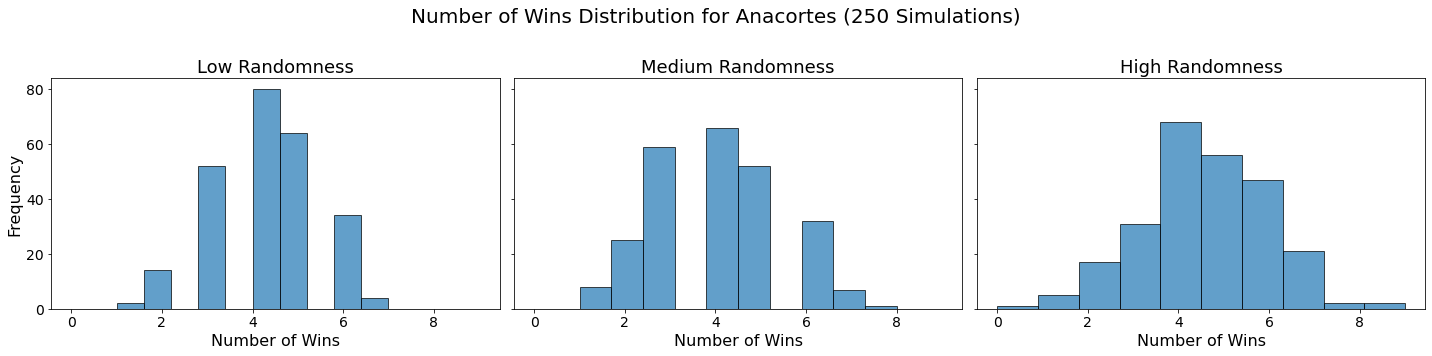

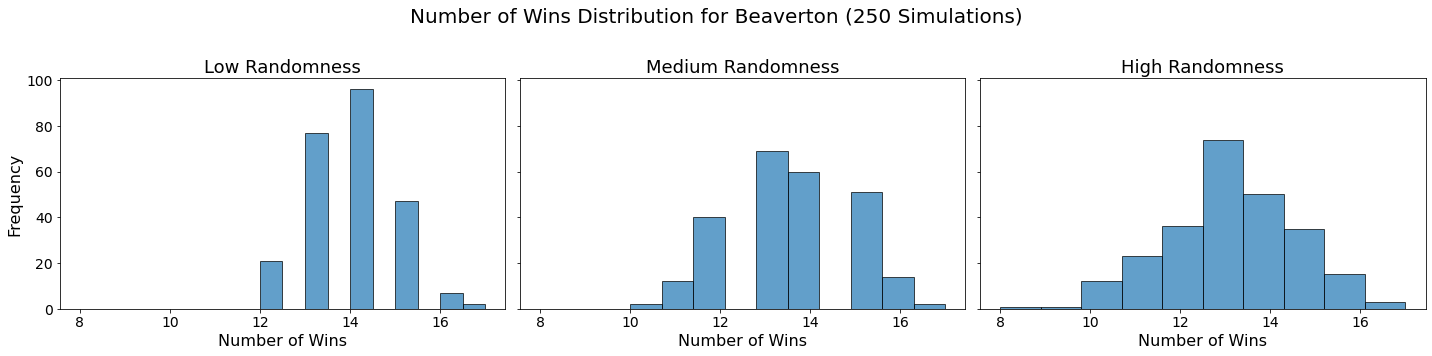

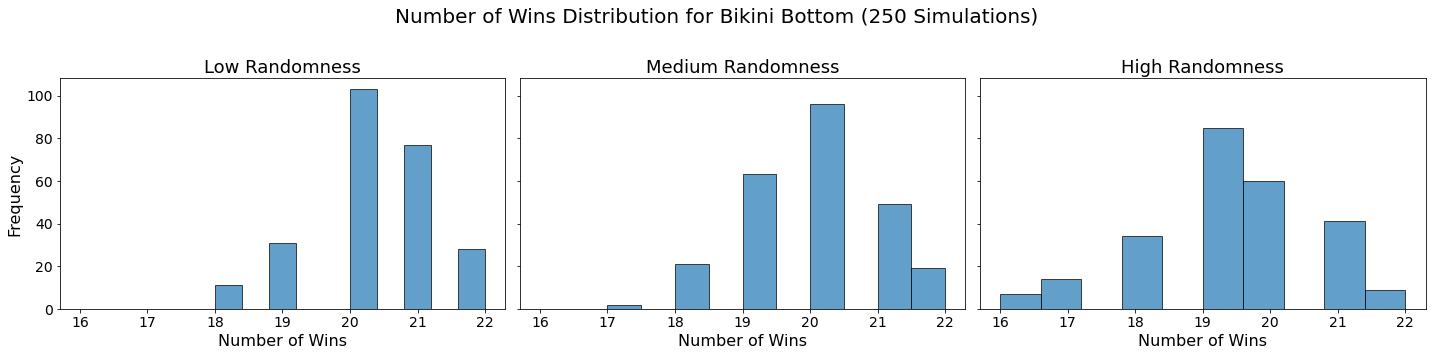

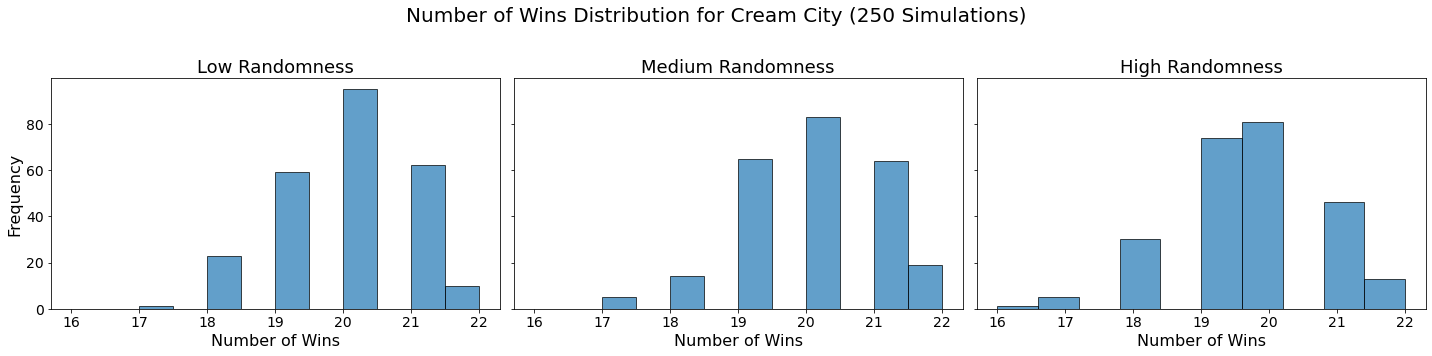

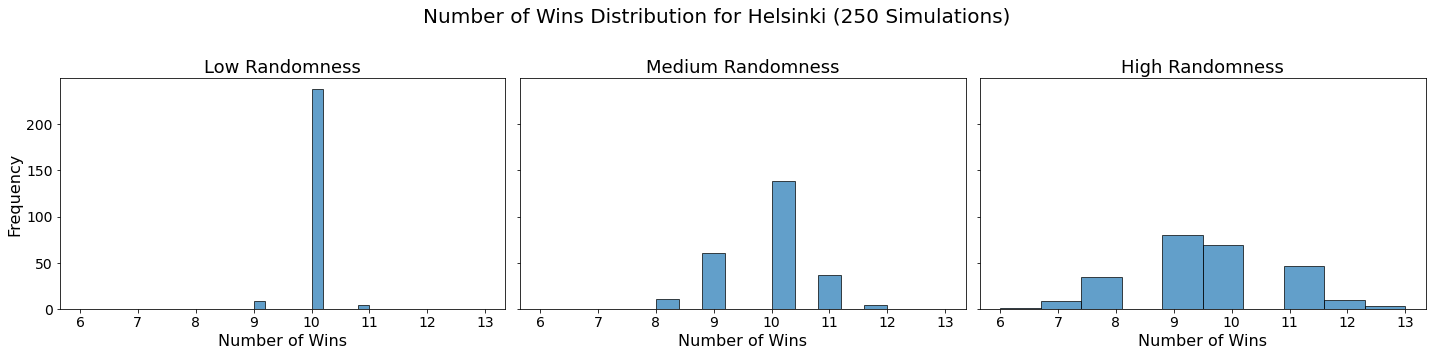

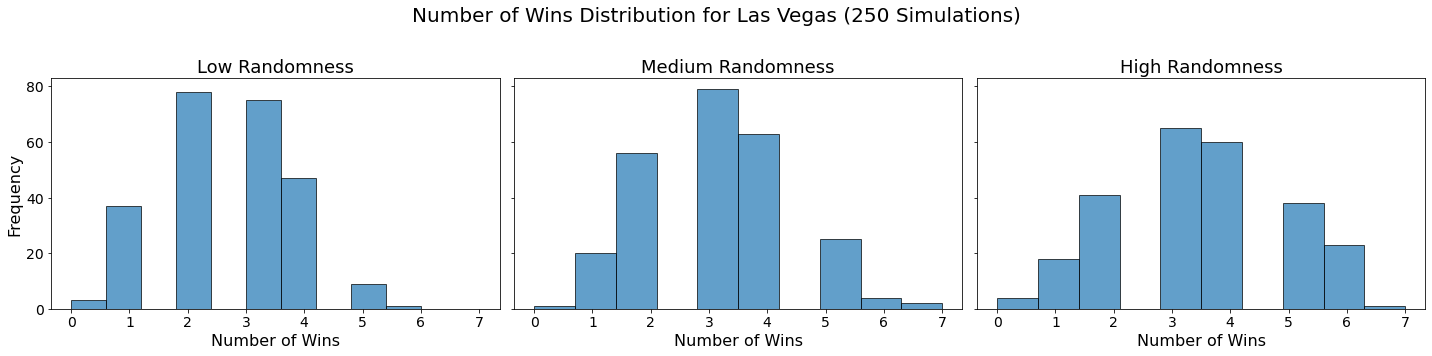

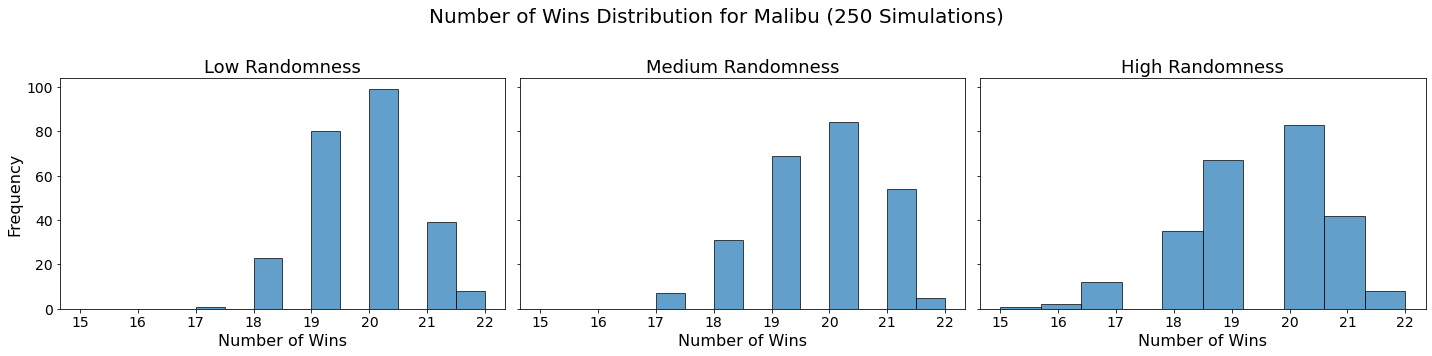

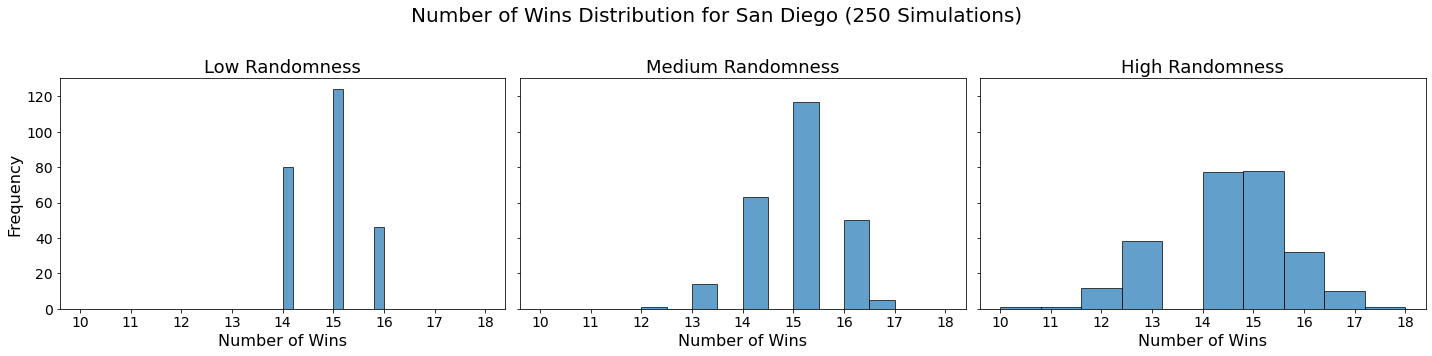

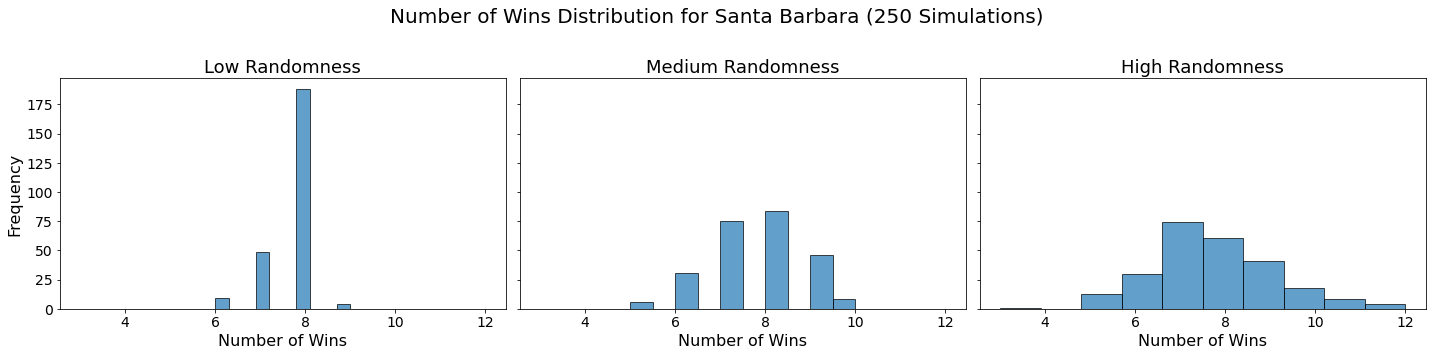

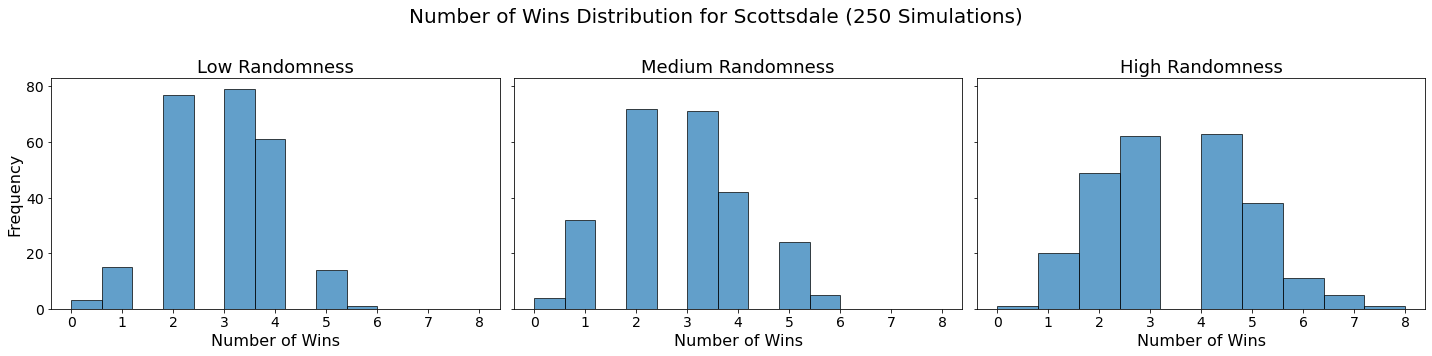

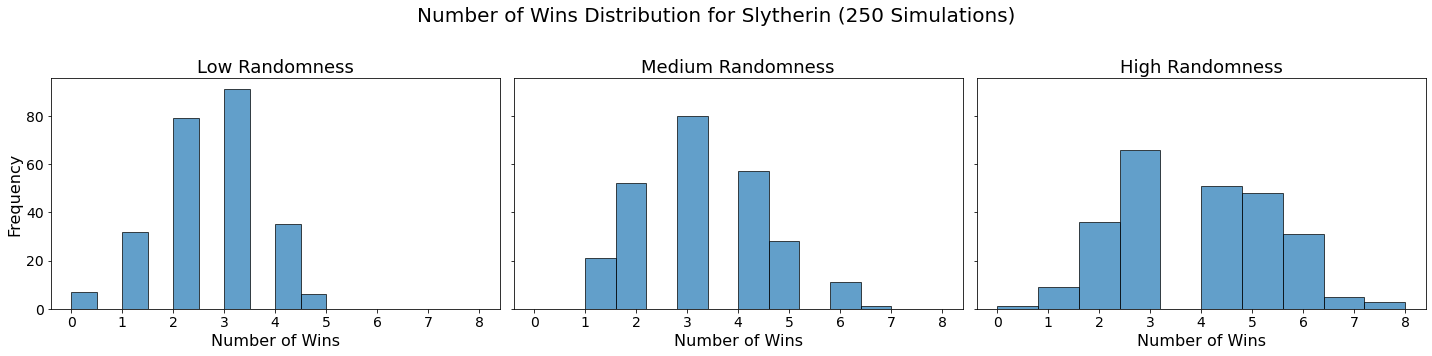

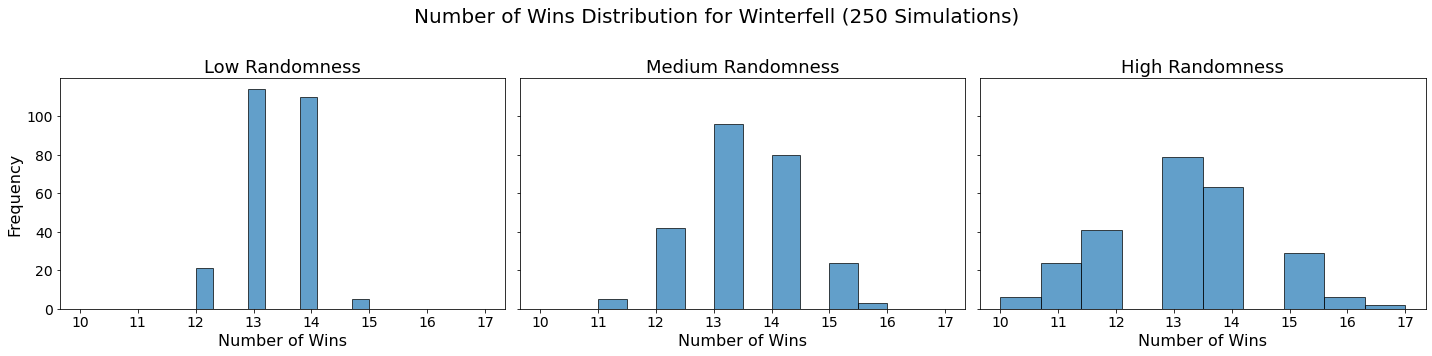

In [207]:
for team in teams:
    fig, axes = plt.subplots(1, len(randomness_levels), figsize=(20, 5), sharex=True, sharey=True)
    fig.suptitle(f'Number of Wins Distribution for {team} (250 Simulations)', fontsize=20)

    for col, (level, results_df) in enumerate(simulation_results.items()):
        axes[col].hist(results_df.loc[team], bins=10, alpha=0.7, edgecolor='black')
        axes[col].set_title(f'{level.capitalize()} Randomness', fontsize=18)
        axes[col].set_xlabel('Number of Wins', fontsize=16)
        axes[col].tick_params(axis='both', which='major', labelsize=14)
        if col == 0:
            axes[col].set_ylabel('Frequency', fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Conclusion

In our analysis, we utilized Monte Carlo simulations to project the outcomes of a fantasy basketball season under different levels of randomness. By running 250 simulations for each level of randomness — low, medium, and high — we were able to model the inherent variability in team performances. This approach not only allowed us to see which teams are likely to excel consistently but also highlighted how randomness can impact the overall season. The histograms generated for each team showed the distribution of their wins across simulations, providing a visual representation of their performance stability.